## Question 5

In [2]:
import numpy as np
from scipy.optimize import fsolve

# Constants
k = 4 
m = 1.0  
ell_0 = 0.2
a = 1.0
g = 9.81
c1 = 0.1
c3 = 0.001
theta = np.radians(30)

def equation(x_eq):
    return (k/m) * x_eq * (1 - ell_0 / np.sqrt(x_eq**2 + a**2)) - g * np.sin(theta)

# Initial guess for the root
x_eq_initial_guess = 1.0

x_eq_first_solution = fsolve(equation, x_eq_initial_guess)

print(f"The root x_eq is: {x_eq_first_solution[0]}")

The root x_eq is: 1.3885430674034003


## Question 6

In [3]:
ell_0 = 5

# Initial guesses for the roots
initial_guesses = np.linspace(-10, 10, 100)

x_eq_second_solution = []
for guess in initial_guesses:
    root = fsolve(equation, guess)[0]
    if not any(np.isclose(root, r, atol=1e-5) for r in x_eq_second_solution):
        x_eq_second_solution.append(root)

print("Roots:", x_eq_second_solution)

Roots: [np.float64(-3.59041754905791), np.float64(-0.32676484291514735), np.float64(6.16167489965105)]


In [4]:
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['figure.figsize'] = (6, 4)

## Question 7

<>:12: SyntaxWarning: invalid escape sequence '\e'
<>:12: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Ido\AppData\Local\Temp\ipykernel_22684\4210282217.py:12: SyntaxWarning: invalid escape sequence '\e'
  plt.axhline(crit_ell_0, color='red', linestyle='--', label=f'$\ell_0 = {crit_ell_0}$')
C:\Users\Ido\AppData\Local\Temp\ipykernel_22684\4210282217.py:3: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt(x_eq**2 + a**2) * (1 - (m * g * np.sin(theta)) / (k * x_eq))


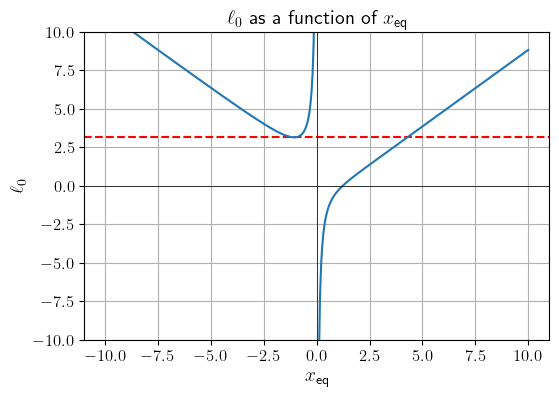

In [5]:
# Function to calculate ell_0
def ell_0(x_eq):
    return np.sqrt(x_eq**2 + a**2) * (1 - (m * g * np.sin(theta)) / (k * x_eq))

x_eq_values = np.linspace(-10, 10, 401)
ell_0_values = ell_0(x_eq_values)

# Set discontinuity at x_eq = 0 to NaN
ell_0_values[np.isclose(x_eq_values, 0, atol=1e-5)] = np.nan

crit_ell_0 = 3.143
plt.axhline(crit_ell_0, color='red', linestyle='--', label=f'$\ell_0 = {crit_ell_0}$')

plt.ylim(-10, 10)

# Plotting
plt.plot(x_eq_values, ell_0_values, label=r'$\ell_0$ as a function of $x_{\text{eq}}$')
plt.xlabel(r'$x_{\text{eq}}$')
plt.ylabel(r'$\ell_0$')
plt.title(r'$\ell_0$ as a function of $x_{\text{eq}}$')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.savefig('plot-output/q7_el0_vs_xeq.png', dpi=300, bbox_inches='tight')
plt.show()


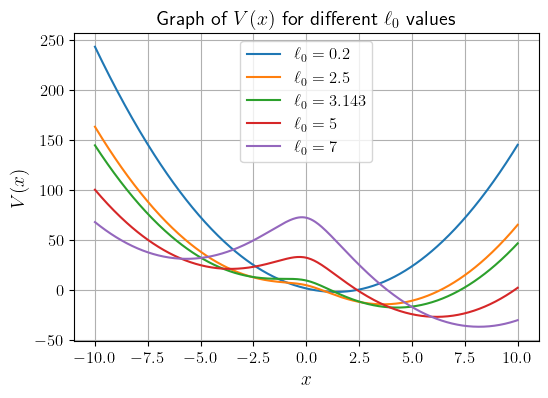

In [6]:
def V(x, ell_0):
    return -m * g * x * np.sin(theta) + k / 2 * (np.sqrt(x**2 + a**2) - ell_0)**2

ell_0_values = [0.2, 2.5, 3.143, 5, 7]

# Generate x values
x = np.linspace(-10, 10, 400)

for ell_0 in ell_0_values:
    plt.plot(x, V(x, ell_0), label=fr'$\ell_0 = {ell_0}$')

plt.xlabel(r'$x$')
plt.ylabel(r'$V(x)$')
plt.title(r'Graph of $V(x)$ for different $\ell_{0}$ values')
plt.legend()
plt.grid(True)
plt.savefig('plot-output/q7_V(x)', dpi=300, bbox_inches='tight')
plt.show()


## Question 8

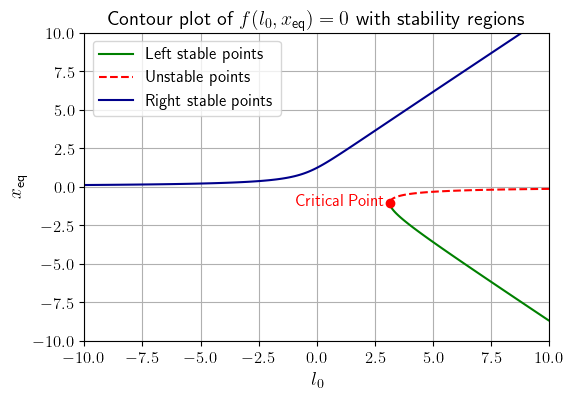

In [7]:
from matplotlib.lines import Line2D

def f(l_0, x_eq):
    return -(k/m) * x_eq * (1 - l_0 / np.sqrt(x_eq**2 + a**2)) + g * np.sin(theta)

# Create a grid of l_0 and x_eq values
ell_0_values = np.linspace(-10, 10, 400)
x_eq_values = np.linspace(-10, 10, 400)
L, X = np.meshgrid(ell_0_values, x_eq_values)

F = f(L, X)

# Define masks
green_mask = X < -1.07
red_mask = (X >= -1.07) & (X < 0)
blue_mask = X >= 0

plt.contour(L, X, np.ma.masked_where(~green_mask, F), levels=[0], colors='green', linestyles='solid', linewidths=1.5)
plt.contour(L, X, np.ma.masked_where(~red_mask, F), levels=[0], colors='red', linestyles='dashed', linewidths=1.5)
plt.contour(L, X, np.ma.masked_where(~blue_mask, F), levels=[0], colors='darkblue', linestyles='solid', linewidths=1.5)


# Mark the critical point x_eq = -1.07
plt.scatter([3.143], [-1.07], color='red', zorder=5)
plt.text(-0.9, -1.45, 'Critical Point', color='red', verticalalignment='bottom')

plt.xlabel(r'$l_0$')
plt.ylabel(r'$x_{\text{eq}}$')
plt.title(r'Contour plot of $f(l_0, x_{\text{eq}}) = 0$ with stability regions')
plt.grid(True)

legend_elements = [
    Line2D([0], [0], color='green', lw=1.5, label='Left stable points'),
    Line2D([0], [0], color='red', lw=1.5, linestyle='dashed', label='Unstable points'),
    Line2D([0], [0], color='darkblue', lw=1.5, label='Right stable points')
]

plt.legend(handles=legend_elements, loc='upper left')
plt.savefig('plot-output/q8_f=0', dpi=300, bbox_inches='tight')
plt.show()

## Question 9

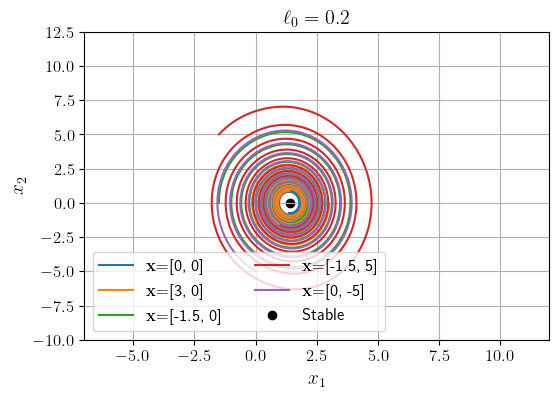

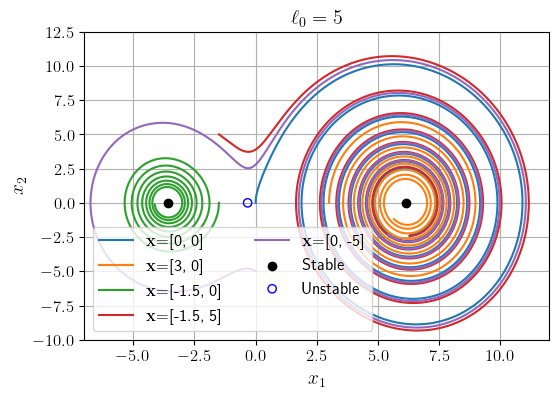

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the general state space function
def state_space(t, y, ell_0, omega, M_0):
    x, x_dot = y
    M_t = M_0 * np.cos(omega * t)
    x_ddot = (m * g * np.sin(theta) - k * x * (1 - ell_0 / np.sqrt(x**2 + a**2)) - c1 * x_dot - c3 * x_dot**3 + M_t * a / (a**2 + x**2)) / m
    return [x_dot, x_ddot]

# Initial conditions
initial_conditions = [
    [0, 0],
    [3, 0],
    [-1.5, 0],
    [-1.5, 5],
    [0, -5]

]

# Time span for the simulation
t_span = (0, 25)
t_eval = np.linspace(t_span[0], t_span[1], 50000) 

# Different ell_0 values
ell_0_values = [0.2, 5]

# Plotting
for ell_0 in ell_0_values:
    for x0 in initial_conditions:
        sol = solve_ivp(state_space, t_span, x0, t_eval=t_eval, args=(ell_0, 0, 0))
        plt.plot(sol.y[0], sol.y[1], label=r'$\mathbf{x}$'+f"={x0}", zorder=4)

    if ell_0 == 0.2:
        plt.scatter(x_eq_first_solution, 0, color="black", label='Stable')
    else:
        plt.scatter(x_eq_second_solution[0], 0, color="black", label="Stable",zorder=5)
        plt.scatter(x_eq_second_solution[1], 0, color="b", label="Unstable", facecolors='none',zorder=5)
        plt.scatter(x_eq_second_solution[2], 0, color="black", zorder=5)

    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.title(rf'$\ell_0={ell_0}$')
    plt.legend(loc='lower left', ncol=2)
    plt.grid()
    plt.xlim(-7, 12)
    plt.ylim(-10, 12.5)
    plt.savefig(f'plot-output/q9-l0={int(ell_0)}', dpi=300, bbox_inches='tight')
    plt.show()

## Question 10

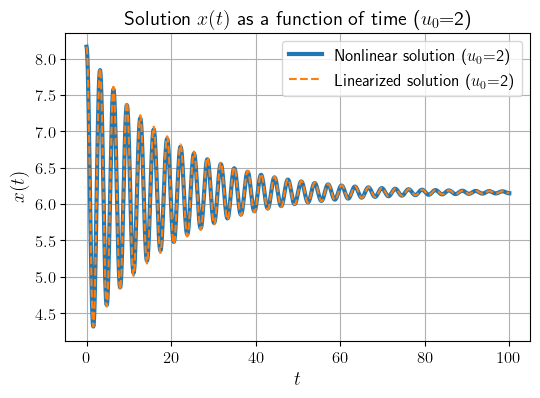

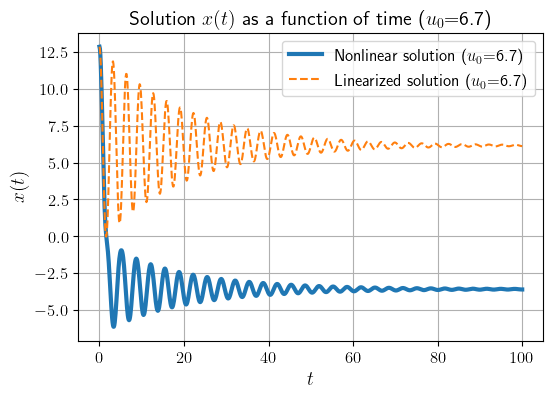

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define parameters
zeta = 0.02526 
omega_n = 1.979  
x_eq = x_eq_second_solution[2]  
ell_0 = 5
t_span = (0, 100)
t_eval = np.linspace(0, 100, 1000)

# Function to compute derived parameters and solutions
def compute_solution(u_0, v_0):
    omega_d = omega_n * np.sqrt(1 - zeta**2)
    A = np.sqrt(u_0**2 + ((zeta * omega_n * u_0 + v_0) / omega_d)**2)
    phi = np.arctan((zeta * omega_n * u_0 + v_0) / (omega_d * u_0))
    
    def u(t):
        return A * np.exp(-zeta * omega_n * t) * np.cos(omega_d * t - phi)
    
    def x(t):
        return u(t) + x_eq
    
    x0 = [u_0 + x_eq, v_0]
    sol = solve_ivp(state_space, t_span, x0, t_eval=t_eval, args=(ell_0, 0, 0))
    
    return x(t_eval), sol

# Compute solutions for both initial conditions
x_t_1, sol_1 = compute_solution(2, 0)
x_t_2, sol_2 = compute_solution(6.7, 0)

# Plotting function
def plot_solution(t, sol, x_t, u_0):
    plt.figure()
    plt.plot(t, sol.y[0], label=f"Nonlinear solution ($u_0$={u_0})", linewidth=3)
    plt.plot(t, x_t, "--", label=f"Linearized solution ($u_0$={u_0})")
    plt.xlabel('$t$')
    plt.ylabel('$x(t)$')
    plt.title(f'Solution $x(t)$ as a function of time ($u_0$={u_0})')
    plt.legend()
    plt.savefig(f'plot-output/q10-u0={int(u_0)}', dpi=300, bbox_inches='tight')
    plt.grid(True)

# Plot for both initial conditions
plot_solution(t_eval, sol_1, x_t_1, 2)
plot_solution(t_eval, sol_2, x_t_2, 6.7)

plt.show()

## Question 11

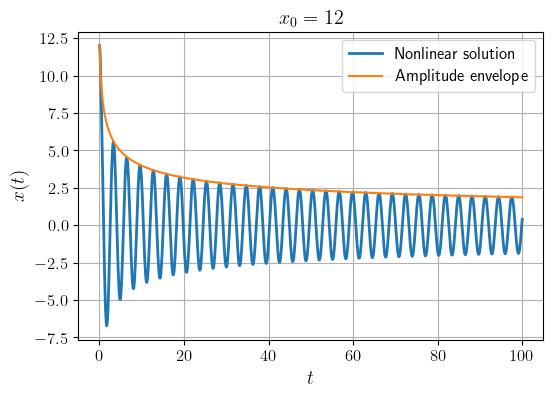

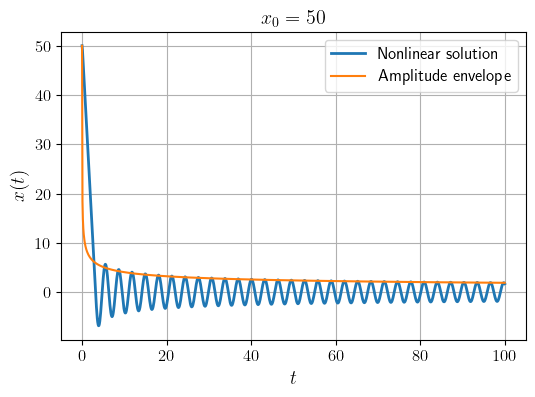

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
c = 0.001
omega_n = np.sqrt(k/m)

initial_conditions = [[12, 0], [50, 0]]

def alt_state_space(t, x):
    x1, x2 = x
    dx1dt = x2
    dx2dt = - (k/m) * x1 - (c/m) * np.abs(x1) * x2**3
    return [dx1dt, dx2dt]

def M_0(t, x0):
    return ( (6 * c * omega_n**4 / (5* np.pi * k) * t + 1 / x0**3) )**(-1/3)

# Generate time array
t_span = (0, 100)
t_eval = np.linspace(0, 100, 1000)

for i, initial_condition in enumerate(initial_conditions):
    sol = solve_ivp(alt_state_space, t_span, initial_condition, t_eval=t_eval)
    A_t = M_0(t_eval, initial_condition[0])
    
    plt.figure()
    plt.plot(t_eval, sol.y[0], label="Nonlinear solution", linewidth=2)
    plt.plot(t_eval, A_t, label="Amplitude envelope")
    plt.xlabel('$t$')
    plt.ylabel('$x(t)$')
    plt.title('$x_0 = ' + str(initial_condition[0]) + '$')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'plot-output/q11-{i}', dpi=300, bbox_inches='tight')
    plt.show()



## Question 12

### Part b

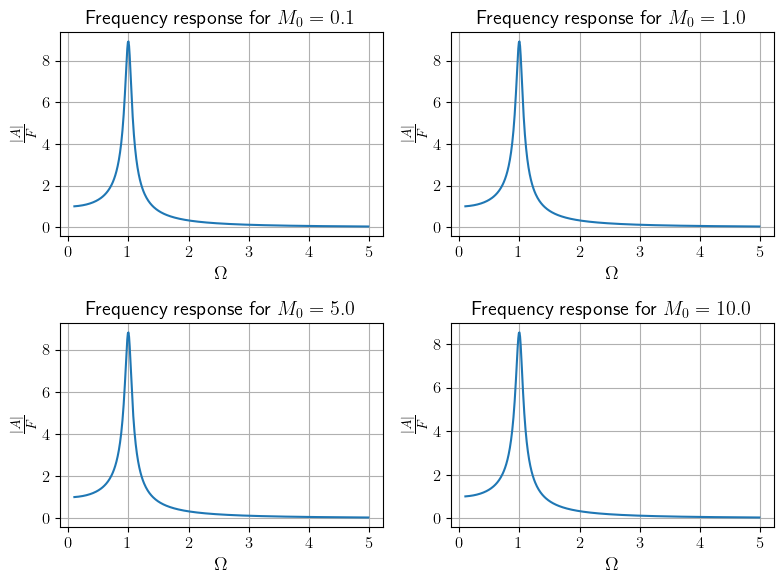

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define constants
k_eq = k * (1 - ell_0 / np.sqrt(a**2 + x_eq**2))
omega_n = np.sqrt(k_eq / m)
F = lambda M_0: a * M_0 / (m * omega_n**2 * (x_eq**2 + a**2))

# Define the implicit function to solve for |A|
def implicit_eq(A, Omega, F_val):
    delta_val = (c1 + (3/4) * c3 * (Omega*omega_n)**2 * A**2) / (m * omega_n)
    lhs = ((1 - Omega**2)**2 + (delta_val * Omega)**2) * A**2
    rhs = F_val**2
    return lhs - rhs

# Define the range of Omega and M0
Omega_span = [0.1, 5]
Omega_step = 0.01
Omega_range = np.arange(Omega_span[0], Omega_span[1], Omega_step)
M_0_values = [0.1, 1.0, 5.0, 10.0]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
axs = axs.flatten()

# Calculate |A| for each Omega and M0 using fsolve
A_F_linearized_damping_values = {M_0: [] for M_0 in M_0_values}
for i, M_0 in enumerate(M_0_values):
    F_val = F(M_0)
    for Omega_val in Omega_range:
        A_initial_guess = 0.1
        A_solution = fsolve(implicit_eq, A_initial_guess, args=(Omega_val, F_val))
        A_F_solution = np.abs(A_solution) / F_val
        A_F_linearized_damping_values[M_0].append(A_F_solution[0])
    
    axs[i].plot(Omega_range, A_F_linearized_damping_values[M_0])
    axs[i].set_xlabel(r'$\Omega$')
    axs[i].set_ylabel(r'$\frac{|A|}{F}$')
    axs[i].set_title(f'Frequency response for $M_0={M_0}$')
    axs[i].grid(True)

plt.tight_layout()
plt.savefig('plot-output/q12-b', dpi=300, bbox_inches='tight')
plt.show()

In [23]:
print(f"|A|/F at omega = 0.1 * omega_n: {A_F_linearized_damping_values[M_0][0]}")
print(f"|A|/F at omega = 5 * omega_n: {A_F_linearized_damping_values[M_0][-1]}")

|A|/F at omega = 0.1 * omega_n: 1.0100362827339178
|A|/F at omega = 5 * omega_n: 0.041829377235925426


### Part c

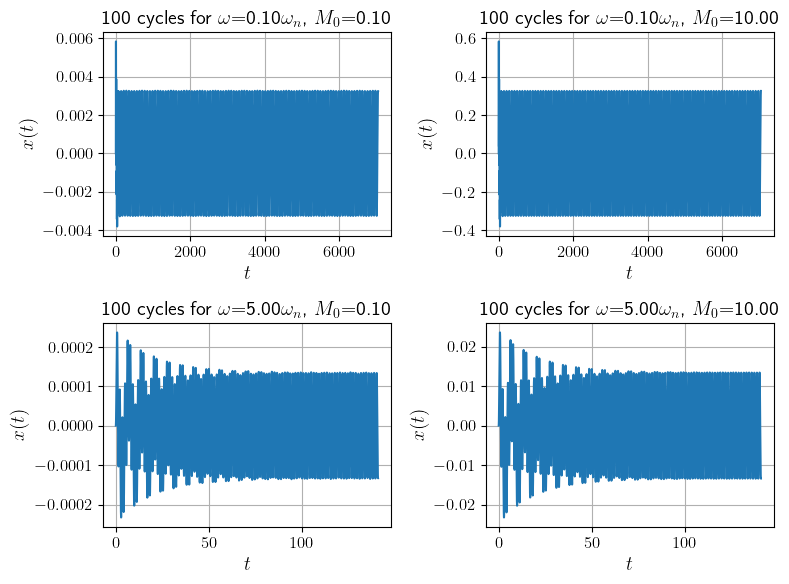

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def state_space(t, y, omega, M_0):
    x, x_dot = y
    M_t = M_0 * np.cos(omega * t)
    x_ddot = (M_t * a / (a**2 + x_eq**2) - k * x * (1 - ell_0 / np.sqrt(a**2 + x_eq**2)) - c1 * x_dot - c3 * x_dot**3) / m
    return [x_dot, x_ddot]


omega_values_coeff = [0.1, 5]
omega_values = [omega_n * coeff for coeff in omega_values_coeff]
M_0_values = [0.1, 10.0]

last_10_cycles = [[[] for _ in M_0_values] for _ in omega_values]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
axs = axs.flatten()

for i, omega in enumerate(omega_values):
    for j, M_0 in enumerate(M_0_values):
        t_span = (0, 100 * 2 * np.pi / omega)
        t_step = 0.01
        t_eval = np.linspace(t_span[0], t_span[1], int((t_span[1] - t_span[0]) / t_step))  

        sol = solve_ivp(state_space, t_span, [0, 0], args=(omega, M_0), t_eval=t_eval)

        # Save the last 10 cycles, both time and response, taking into account the period of the system and the time step
        ten_cycles = int(10 * 2 * np.pi / omega / t_step)
        last_10_cycles[i][j] = (sol.t[-ten_cycles:], sol.y[0][-ten_cycles:])
        
        axs[i * 2 + j].plot(sol.t, sol.y[0])
        axs[i * 2 + j].set_xlabel(r'$t$')
        axs[i * 2 + j].set_ylabel(r'$x(t)$')
        axs[i * 2 + j].set_title(rf'100 cycles for $\omega$={omega_values_coeff[i]:.2f}$\omega_n$, $M_0$={M_0:.2f}')
        axs[i * 2 + j].grid(True)
        
plt.tight_layout()
plt.savefig(f'plot-output/q12-c', dpi=300, bbox_inches='tight')
plt.show()



### Part d

For omega=0.10*omega_n and M_0=0.10:
	 Amplitude ratio (A/F): 1.0099655530879943
	 Phase difference: 0.6478363765490998 degrees
For omega=0.10*omega_n and M_0=10.00:
	 Amplitude ratio (A/F): 1.0100211925434814
	 Phase difference: 0.6491503151199068 degrees
For omega=5.00*omega_n and M_0=0.10:
	 Amplitude ratio (A/F): 0.04149179688018125
	 Phase difference: 178.70857247041326 degrees
For omega=5.00*omega_n and M_0=10.00:
	 Amplitude ratio (A/F): 0.04165029257060937
	 Phase difference: 178.66486193945272 degrees


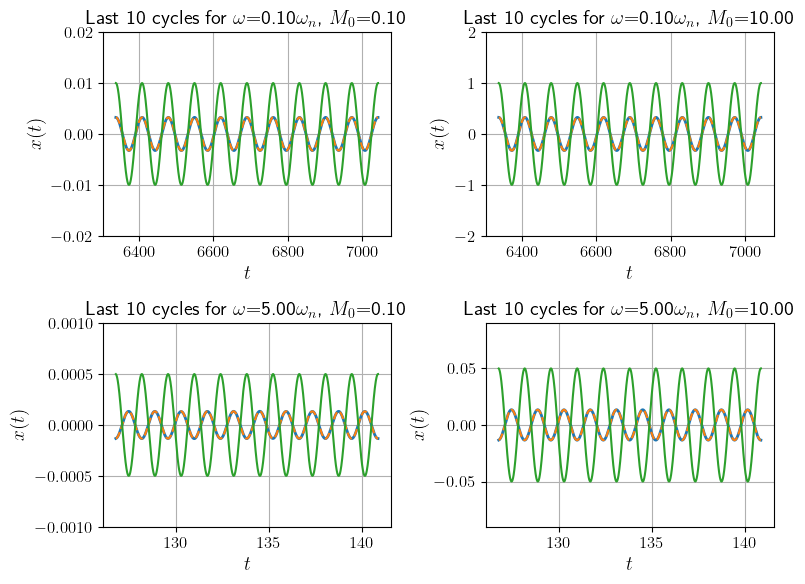

In [13]:
from scipy.optimize import least_squares

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
axs = axs.flatten()

M_0_normlization = [[0.1, 0.1], [0.005, 0.005]]
bounds_from_eq = [[0.02, 2], [0.001, 0.09]]
for i, omega in enumerate(omega_values):
    for j, M_0 in enumerate(M_0_values):
        t, x = last_10_cycles[i][j]
        M_t = M_0 * np.cos(omega * t)

        # Normalize x
        x_norm = (x - np.mean(x)) / np.std(x)

        # Least squares to find the amplitude and phase difference
        def residuals(params):
            A_fit, phi_fit = params
            return x_norm - A_fit * np.cos(omega * t - phi_fit)

        initial_guess = [1.0, 0.0]
        result = least_squares(residuals, initial_guess, jac="3-point", loss='linear', bounds=([0, -np.pi], [np.inf, np.pi]))
        A_fit, phi_fit = result.x
        A_F = A_fit * np.std(x) / F(M_0) # Adjust amplitude back to original scale

        axs[i * 2 + j].plot(t, x, label='$x(t)$', linewidth=2)
        axs[i * 2 + j].plot(t, A_fit * np.std(x) * np.cos(omega * t - phi_fit) + np.mean(x), label='Fitted response', linestyle='--')
        axs[i * 2 + j].plot(t, M_t * M_0_normlization[i][j] , label=rf'${M_0_normlization[i][j]}M(t)$')
        axs[i * 2 + j].set_xlabel(r'$t$')
        axs[i * 2 + j].set_ylabel(r'$x(t)$')
        axs[i * 2 + j].set_ylim(-bounds_from_eq[i][j], bounds_from_eq[i][j])
        axs[i * 2 + j].set_title(rf'Last 10 cycles for $\omega$={omega_values_coeff[i]:.2f}$\omega_n$, $M_0$={M_0:.2f}')
        axs[i * 2 + j].grid(True)

        print(f'For omega={omega_values_coeff[i]:.2f}*omega_n and M_0={M_0:.2f}:')
        print(f'\t Amplitude ratio (A/F): {A_F}')
        print(f'\t Phase difference: {np.degrees(phi_fit)} degrees')

plt.tight_layout()
plt.savefig(f'plot-output/q12-d', dpi=300, bbox_inches='tight')
plt.show()



### Part e

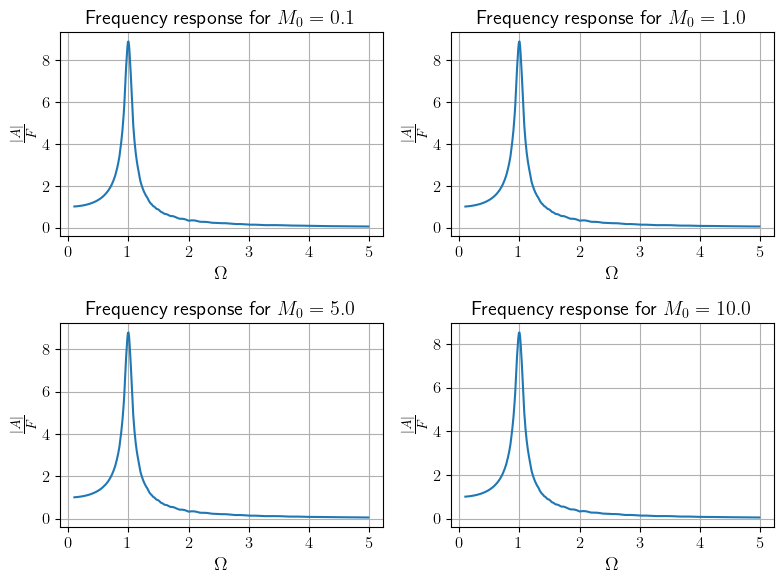

In [14]:
M_0_values = [0.1, 1.0, 5.0, 10.0]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
axs = axs.flatten()

A_F_numeric = {M_0: [] for M_0 in M_0_values}
# Calculate |A|/M0 for each omega and each amplitude
for i, M_0 in enumerate(M_0_values):
    for Omega in Omega_range:
        omega = Omega * omega_n
        t_span = (80 * 2 * np.pi / omega, 100 * 2 * np.pi / omega)
        t_step = 0.01
        t_eval = np.linspace(t_span[0], t_span[1], int((t_span[1] - t_span[0]) / t_step))

        sol = solve_ivp(state_space, t_span, [0, 0], args=(omega, M_0), t_eval=t_eval)

        ten_cycles = int((10 * 2 * np.pi) / (omega * t_step))
        steady_state_amplitude = np.max(sol.y[0][-ten_cycles:])

        A_F = steady_state_amplitude / F(M_0)
        A_F_numeric[M_0].append(np.abs(A_F))

    axs[i].plot(Omega_range, A_F_numeric[M_0], label='Numeric')
    # axs[i].plot(Omega_range, A_F_linearized_damping_values[M_0], label='Linearized damping', linestyle='--')
    axs[i].set_xlabel(r'$\Omega$')
    axs[i].set_ylabel(r'$\frac{|A|}{F}$')
    axs[i].set_title(f'Frequency response for $M_0={M_0}$')
    axs[i].grid(True)
    

plt.tight_layout()
plt.savefig('plot-output/q12-e_combined.png', dpi=300, bbox_inches='tight')
plt.show()

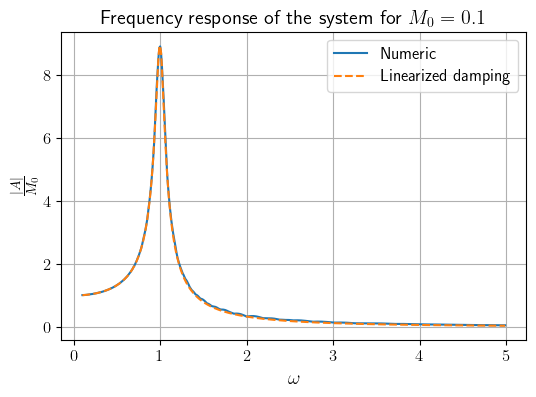

In [24]:
# Now plot A_M0_numeric and A_M0_analytical
plt.plot(Omega_range, A_F_numeric[M_0_values[0]], label='Numeric')
plt.plot(Omega_range, A_F_linearized_damping_values[M_0_values[0]], label='Linearized damping', linestyle='--')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\frac{|A|}{M_0}$')
plt.title(f'Frequency response of the system for $M_0={M_0_values[0]}$')
plt.legend()
plt.grid(True)
plt.savefig('plot-output/q12-e_comparison.png', dpi=300, bbox_inches='tight')
plt.show()



## Question 12 for the original system

### Part b (og system)

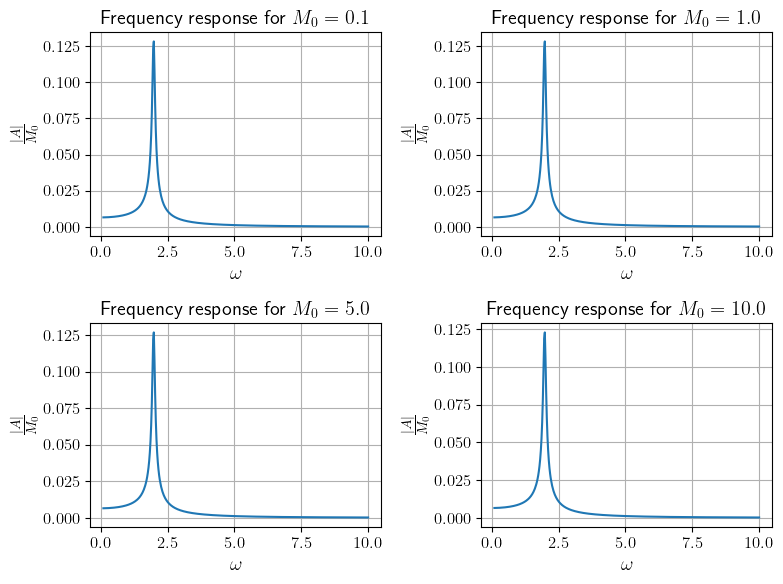

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define the implicit function to solve for |A|
def implicit_eq(A, omega, M_0):
    term1 = (c1 + (3/4) * c3 * omega**2 * A**2)**2 * omega**2
    term2 = (k * (1 - ell_0 * a**2 / (x_eq**2 + a**2)**(3/2)) - m * omega**2)**2
    lhs = (A**2 / M_0**2) * (term1 + term2)
    rhs = (1 / (x_eq**2 + a**2))**2 
    return lhs - rhs

# Define the range of omega and M0
Omega = np.linspace(0.1, 10, 400)
M_0_values = [0.1, 1.0, 5.0, 10.0]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
axs = axs.flatten()

# Calculate |A| for each omega and M0 using fsolve
A_M_0_linearized_damping_values = {M_0: [] for M_0 in M_0_values}
for i, M_0 in enumerate(M_0_values):
    for w in Omega:
        A_initial_guess = 0.1
        A_solution = fsolve(implicit_eq, A_initial_guess, args=(w, M_0))
        A_M_0_solution = np.abs(A_solution) / M_0
        A_M_0_linearized_damping_values[M_0].append(A_M_0_solution[0])
    
    axs[i].plot(Omega, A_M_0_linearized_damping_values[M_0])
    axs[i].set_xlabel(r'$\omega$')
    axs[i].set_ylabel(r'$\frac{|A|}{M_0}$')
    axs[i].set_title(f'Frequency response for $M_0={M_0}$')
    axs[i].grid(True)

plt.tight_layout()
plt.savefig('plot-output/q12-og-b', dpi=300, bbox_inches='tight')
plt.show()

In [17]:

print(f"|A|/M0 at omega = 0.2: {A_F_linearized_damping_values[M_0][int(0.2*400/10)]}")
print(f"|A|/M0 at omega = 10: {A_F_linearized_damping_values[M_0][-1]}")


|A|/M0 at omega = 0.2: 1.0332603346400224
|A|/M0 at omega = 10: 0.041829377235925426


### Part c (og system)


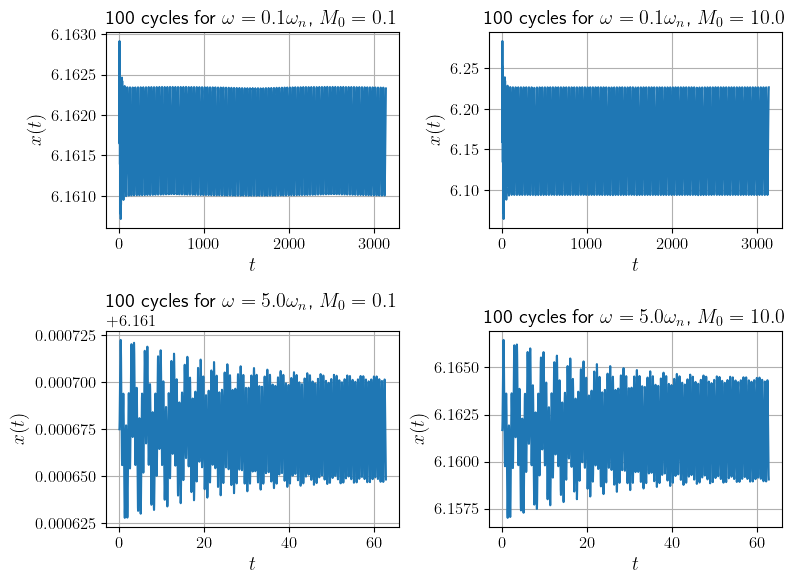

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

omega_n = np.sqrt(k / m)  # natural frequency

omega_values = [0.1 * omega_n, 5.0 * omega_n]
M_0_values = [0.1, 10.0]

last_10_cycles = [[] for _ in omega_values]

# Define the general state space function
def state_space(t, y, ell_0, omega, M_0):
    x, x_dot = y
    M_t = M_0 * np.cos(omega * t)
    x_ddot = (m * g * np.sin(theta) - k * x * (1 - ell_0 / np.sqrt(x**2 + a**2)) - c1 * x_dot - c3 * x_dot**3 + M_t * a / (a**2 + x**2)) / m
    return [x_dot, x_ddot]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
axs = axs.flatten()

for i, omega in enumerate(omega_values):
    for j, M_0 in enumerate(M_0_values):
        t_span = (0, 100 * 2 * np.pi / omega)
        t_step = 0.01  # time step
        t_eval = np.linspace(t_span[0], t_span[1], int((t_span[1] - t_span[0]) / t_step))  

        sol = solve_ivp(state_space, t_span, [x_eq, 0], args=(ell_0, omega, M_0), t_eval=t_eval)

        # Save the last 10 cycles, both time and response, taking into account the period of the system and the time step
        last_10_cycles[i].append((sol.t[-int(10 * 2 * np.pi / omega / t_step):], sol.y[0][-int(10 * 2 * np.pi / omega / t_step):]))
        
        axs[i * 2 + j].plot(sol.t, sol.y[0])
        axs[i * 2 + j].set_xlabel(r'$t$')
        axs[i * 2 + j].set_ylabel(r'$x(t)$')
        axs[i * 2 + j].set_title('100 cycles for ' + rf'$\omega={omega/omega_n:.1f}\omega_n$, $M_0={M_0:.1f}$')
        axs[i * 2 + j].grid(True)
        
plt.tight_layout()
plt.savefig(f'plot-output/q12-og-c', dpi=300, bbox_inches='tight')
plt.show()



### Part d (og system)

For omega=0.20 and M_0=0.10:
	 Amplitude ratio: 0.00661754644197189
	 Phase difference: 0.2939081953482851 degrees
For omega=0.20 and M_0=10.00:
	 Amplitude ratio: 0.006621729676823907
	 Phase difference: 0.29643422974609185 degrees
For omega=10.00 and M_0=0.10:
	 Amplitude ratio: 0.0002663148823770744
	 Phase difference: -179.94939249219144 degrees
For omega=10.00 and M_0=10.00:
	 Amplitude ratio: 0.0002664909436133994
	 Phase difference: 179.4341257792274 degrees


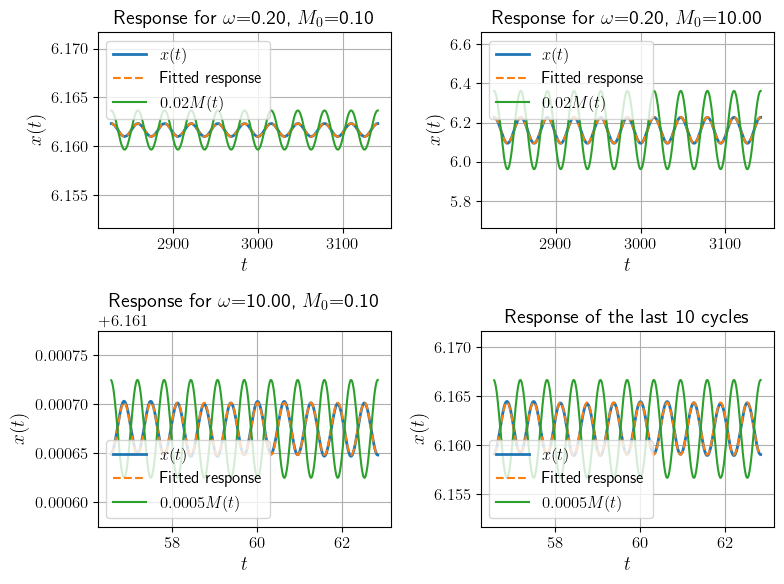

In [19]:
from scipy.optimize import least_squares

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
axs = axs.flatten()

M_0_normlization = [[0.02, 0.02], [0.0005, 0.0005]]
bounds_from_eq = [[0.01, 0.5], [0.0001, 0.01]]
for i, omega in enumerate(omega_values):
    for j, M_0 in enumerate(M_0_values):
        t, x = last_10_cycles[i][j]
        M_t = M_0 * np.cos(omega * t)

        # Normalize x
        x_norm = (x - np.mean(x)) / np.std(x)

        # Least squares to find the amplitude and phase difference
        def residuals(params):
            A_fit, phi_fit = params
            return x_norm - A_fit * np.cos(omega * t - phi_fit)

        initial_guess = [1.0, 0.0]
        result = least_squares(residuals, initial_guess, jac="3-point", loss='linear', bounds=([0, -np.pi], [np.inf, np.pi]))
        A_fit, phi_fit = result.x
        A_M_0 = A_fit * np.std(x) / M_0  # Adjust amplitude back to original scale

        axs[i * 2 + j].plot(t, x, label='$x(t)$', linewidth=2)
        axs[i * 2 + j].plot(t, A_fit * np.std(x) * np.cos(omega * t - phi_fit) + np.mean(x), label='Fitted response', linestyle='--')
        axs[i * 2 + j].plot(t, M_t * M_0_normlization[i][j] + x_eq, label=rf'${M_0_normlization[i][j]}  M(t)$')
        axs[i * 2 + j].set_xlabel(r'$t$')
        axs[i * 2 + j].set_ylabel(r'$x(t)$')
        axs[i * 2 + j].set_ylim(x_eq-bounds_from_eq[i][j], x_eq+bounds_from_eq[i][j])
        axs[i * 2 + j].set_title(rf'Response for $\omega$={omega:.2f}, $M_0$={M_0:.2f}')
        axs[i * 2 + j].legend()
        axs[i * 2 + j].grid(True)

        print(f'For omega={omega:.2f} and M_0={M_0:.2f}:')
        print(f'\t Amplitude ratio: {A_M_0}')
        print(f'\t Phase difference: {np.degrees(phi_fit)} degrees')

plt.title('Response of the last 10 cycles')
plt.tight_layout()       
plt.savefig(f'plot-output/q12-og-d', dpi=300, bbox_inches='tight')
plt.show()



### Part e (og system)

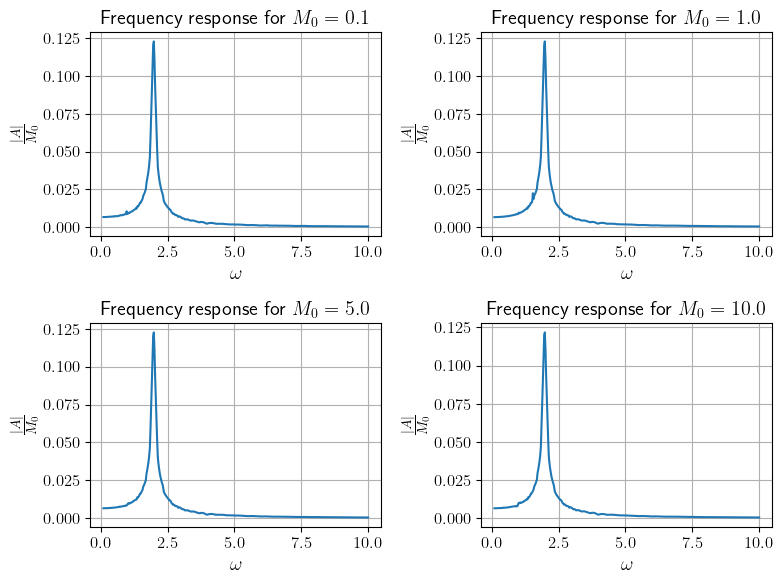

In [20]:
# Define the range of omega
omega_values = np.linspace(0.1, 10, 400)
M_0_values = [0.1, 1.0, 5.0, 10.0]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
axs = axs.flatten()

A_M0_numeric = {M_0: [] for M_0 in M_0_values}
# Calculate |A|/M0 for each omega and each amplitude
for i, M_0 in enumerate(M_0_values):
    for omega in omega_values:
        # Time span for the simulation
        t_span = (80 * 2 * np.pi / omega, 100 * 2 * np.pi / omega)
        t_step = 0.01
        t_eval = np.linspace(t_span[0], t_span[1], int((t_span[1] - t_span[0]) / t_step))
        sol = solve_ivp(state_space, t_span, [x_eq, 0], args=(ell_0, omega, M_0), t_eval=t_eval)
        # Calculate the amplitude in steady state (last 10 cycles)
        steady_state_amplitude = np.max(sol.y[0][-int(10 * 2 * np.pi / omega / t_step):]) - x_eq
        A_M_0 = steady_state_amplitude / M_0
        A_M0_numeric[M_0].append(np.abs(A_M_0))

    axs[i].plot(omega_values, A_M0_numeric[M_0], label='Numeric')
    # axs[i].plot(omega_values, A_M0_linearized_damping_values[M_0], label='Linearized damping', linestyle='--')
    axs[i].set_xlabel(r'$\omega$')
    axs[i].set_ylabel(r'$\frac{|A|}{M_0}$')
    axs[i].set_title(f'Frequency response for $M_0={M_0}$')
    axs[i].grid(True)
    

plt.tight_layout()
plt.savefig('plot-output/q12-og-e_combined.png', dpi=300, bbox_inches='tight')
plt.show()

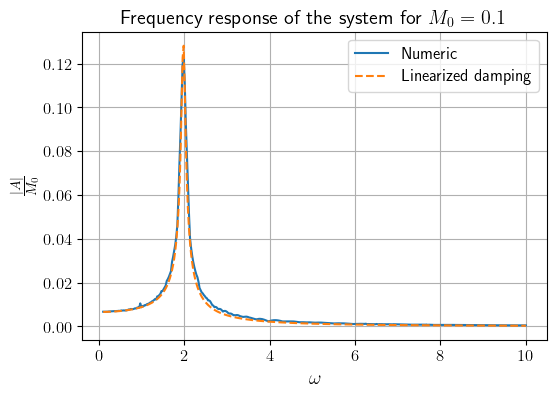

In [21]:
# Now plot A_M0_numeric and A_M0_analytical
plt.plot(omega_values, A_M0_numeric[M_0_values[0]], label='Numeric')
plt.plot(omega_values, A_M_0_linearized_damping_values[M_0_values[0]], label='Linearized damping', linestyle='--')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\frac{|A|}{M_0}$')
plt.title(f'Frequency response of the system for $M_0={M_0_values[0]}$')
plt.legend()
plt.grid(True)
plt.savefig('plot-output/q12-og-e_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

